# **Step 1: Reading and Understanding the Data**

 importing NumPy and Pandas to read the dataset

In [ ]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing dataset
lead_df = pd.read_csv('/content/drive/MyDrive/MS Data Analytics/Course 2 Machine learning/Lead Scoring Assignment/Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
# inspect lead_df dataframe
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
# Shape
lead_df.shape

(9240, 37)

In [ ]:
# Columns having null values
lead_df.isnull().any()

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                       True
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                       True
Total Time Spent on Website                      False
Page Views Per Visit                              True
Last Activity                                     True
Country                                           True
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                   True
What matters most to you in choosing a course     True
Search                                           False
Magazine                                         False
Newspaper 

In [ ]:
# Describe
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# **Step2 : Data Cleaning**

In [ ]:
# checking the percentage of null values in each column
round(100*(lead_df.isnull().sum()/len(lead_df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [ ]:
# Checking if there are any duplicate values in the dataset
lead_df[lead_df.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


Therefore there are no duplicate value in the data

In [ ]:
# Following columns have a value called select. Converting those values as nan since the customer has not selected any options for
# those columns while entering the data.

# a) Specialization
# b) How did you hear about X Education
# c) Lead Profile
# d) City

# Converting 'Select' values to NaN.

lead_df['Specialization'] = lead_df['Specialization'].replace('Select', np.nan)
lead_df['How did you hear about X Education'] = lead_df['How did you hear about X Education'].replace('Select', np.nan)
lead_df['Lead Profile'] = lead_df['Lead Profile'].replace('Select', np.nan)
lead_df['City'] = lead_df['City'].replace('Select', np.nan)

In [ ]:
# checking the percentage of null values in each column
round(100*(lead_df.isnull().sum()/len(lead_df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [ ]:
#dropping cols with more than 30% missing values

cols=lead_df.columns

for i in cols:
    if((100*(lead_df[i].isnull().sum()/len(lead_df.index))) > 30):
        lead_df.drop(i, 1, inplace = True)

In [ ]:
# checking the percentage of null values in each column after dropping columns having more than 30% null values
round(100*(lead_df.isnull().sum()/len(lead_df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Following columns have null values : - Country - Lead Source - Total Visits - Page Views Per Visit - Last Activity - What is your current occupation - What matters most to you in choosing a course

**Country**

In [ ]:
# checking the value counts for each values in the country column
lead_df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [ ]:
# checking the percentage of India as value in the country column
round(100*len(lead_df[lead_df.Country == 'India'])/len(lead_df.Country),2)

70.26

In [ ]:
# Since "India" occurs around 70% of times in the Country column, and country column also has around 27% as missing values,
# so,dropping the column
lead_df = lead_df.drop(['Country'], axis=1)

**Lead Source**

In [ ]:
# Checking the value counts for the column Lead Source
lead_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

 From the above it can be noticed that Google appears twice with different cases. Hence we shall convert all rows with value
 "Google" to the same case.
 Also since "Google" has the major chunk of data, we can impute the null values with Google

In [ ]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace('google', 'Google')
lead_df['Lead Source'] = lead_df['Lead Source'].replace(np.nan, 'Google')

**TotalVisits**

In [ ]:
# Checking the value counts for the column Total Visits
lead_df['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [ ]:
# Checking the median of column and imputing the null values in TotalVisits by the median value
print(f"Median: {lead_df['TotalVisits'].median()}")
lead_df['TotalVisits'] = lead_df['TotalVisits'].replace(np.nan, lead_df['TotalVisits'].median())

Median: 3.0


**Page Views Per Visit**

In [ ]:
# Checking the value counts for Page Views Per Visit
lead_df['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [ ]:
# Checking the median of column and imputing the null values in Page Views Per Visit by the median value
print(f"Median: {lead_df['Page Views Per Visit'].median()}")
lead_df['Page Views Per Visit'] = lead_df['Page Views Per Visit'].replace(np.nan, lead_df['Page Views Per Visit'].median())

Median: 2.0


**Last Activity**

In [ ]:
# Check the value counts for Page Views Per Visit
lead_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [ ]:
# Since we do not have any information of what the last activity of the customer would have been, we can add a new category
# called 'Not Sure' for the null values

lead_df['Last Activity'] = lead_df['Last Activity'].replace(np.nan, 'Not Sure')

In [ ]:
lead_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Not Sure                         103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

**What is your current Occupation**

In [ ]:
# Checking the value counts for the column "What is your current Occupation"
lead_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [ ]:
# Since no information has been provided Current Occupation, we can add a new category called No Information and set that
# as value for the null columns
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'No Information')

In [ ]:
lead_df['What is your current occupation'].value_counts()

Unemployed              5600
No Information          2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

**What matters most to you in choosing a course**

In [ ]:
# Check the value counts for the column What matters most to you in choosing a course
lead_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [ ]:
# Since Better Career Prospects occurs around most of times in the What matters most to you in choosing a course column, and
# since the column also has around 29% as missing values, we shall go ahead and drop the column

lead_df = lead_df.drop(['What matters most to you in choosing a course'], axis=1)

In [ ]:
# checking for percentage of null values in each column

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

No null values left

In [ ]:
lead_df.Magazine

0       No
1       No
2       No
3       No
4       No
        ..
9235    No
9236    No
9237    No
9238    No
9239    No
Name: Magazine, Length: 9240, dtype: object

In [ ]:
# Since the following columns have only one value "No" in all the rows, we can eliminate the columns :

# a) Magazine
# b) Receive More Updates About Our Courses
# c) Update me on Supply Chain Content
# d) Get updates on DM Content
# e) I agree to pay the amount through cheque

lead_df = lead_df.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content',
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [ ]:
lead_df.shape

(9240, 20)

In [ ]:
# Checking outliers at 25%,50%,75%,90%,95% and above
lead_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


it can be seen that outlier exists in the columns TotalVisits and Page Views Per Visit columns.

<Axes: ylabel='Page Views Per Visit'>

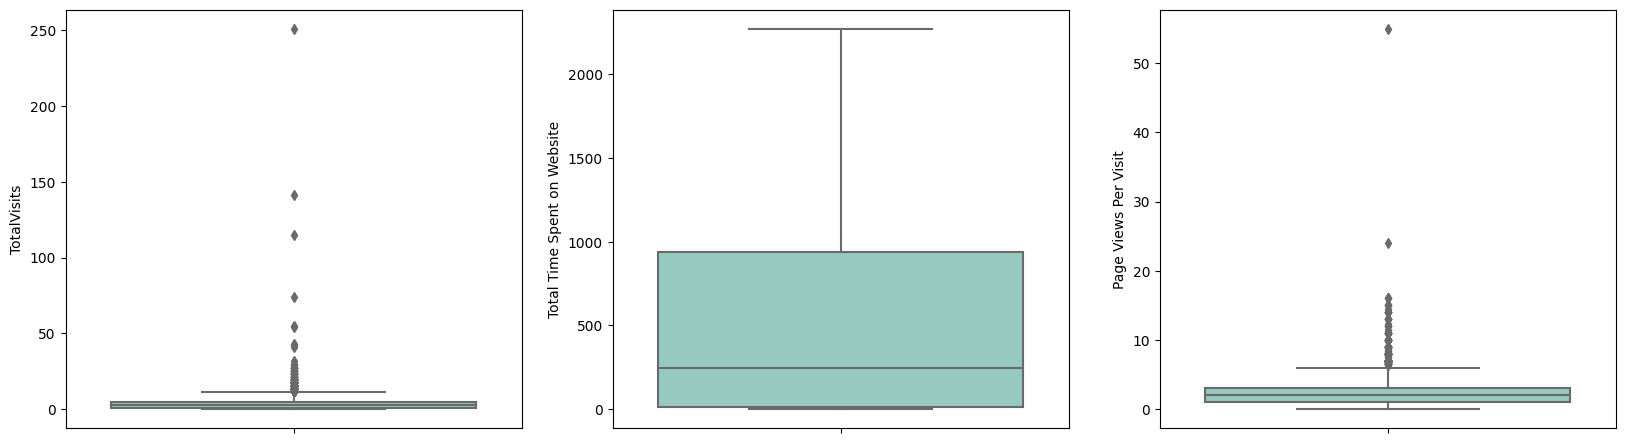

In [ ]:
# Checking the outliers in all the numeric columns
plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = lead_df)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = lead_df)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = lead_df)

In [ ]:
# Removing values beyond 99% for Total Visits
nn_quartile_total_visits = lead_df['TotalVisits'].quantile(0.99)
lead_df = lead_df[lead_df["TotalVisits"] < nn_quartile_total_visits]
lead_df["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [ ]:
# Removing values beyond 99% for Total Visits
nn_quartile_total_visits = lead_df['Page Views Per Visit'].quantile(0.99)
lead_df = lead_df[lead_df["Page Views Per Visit"] < nn_quartile_total_visits]
lead_df["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [ ]:
# Checking outliers at 25%,50%,75%,90%,95% and above
lead_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,617223.248422,0.385092,3.087164,483.133016,2.226383
std,23372.383121,0.486644,2.801244,547.420675,1.823395
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596530.000000,0.000000,1.000000,7.000000,1.000000
50%,615645.000000,0.000000,3.000000,245.000000,2.000000
75%,637360.000000,1.000000,4.000000,929.000000,3.000000
90%,650463.200000,1.000000,7.000000,1378.000000,5.000000
95%,655351.600000,1.000000,8.000000,1558.000000,6.000000
99%,659577.800000,1.000000,13.000000,1839.720000,7.000000


In [ ]:
# Determining the percentage of data retained
round(100*(len(lead_df)/9240),2)

97.72

At this point, the data has been cleaned and around 98% of data has been retained

# **Step 3: Data Analysis**

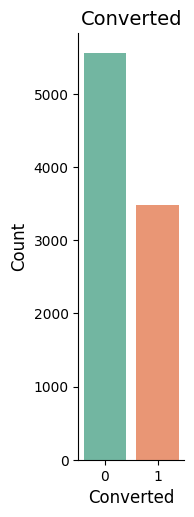

In [ ]:
# Conversion Rate
sns.catplot(x="Converted", kind="count", data=lead_df, palette="Set2", aspect= 0.4)
plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

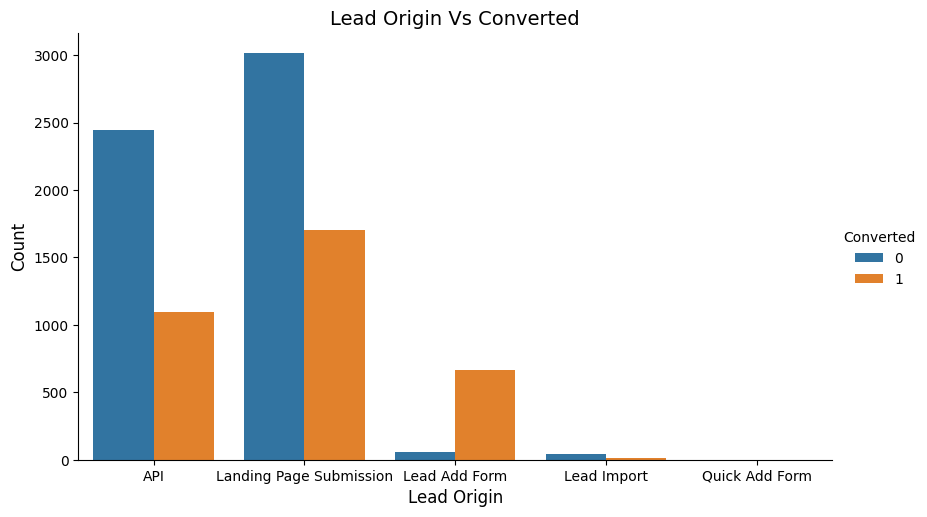

In [ ]:
# lead Origin
sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=lead_df, aspect= 1.7)
plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

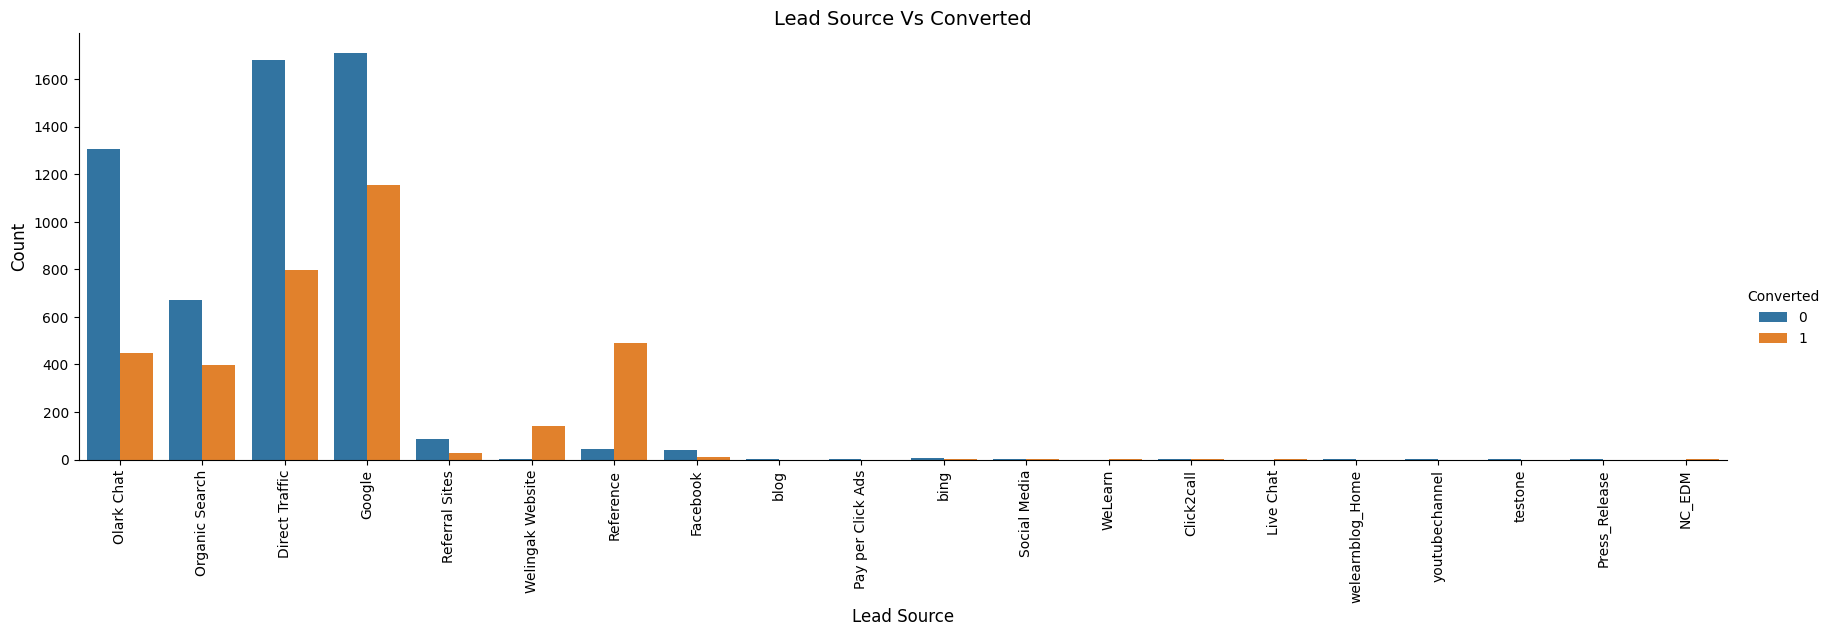

In [ ]:
# Lead Source
sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=lead_df, aspect= 3.5)
plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation = 90)
plt.show()

From the above graph, it can be seen that major conversion in the lead source is from google

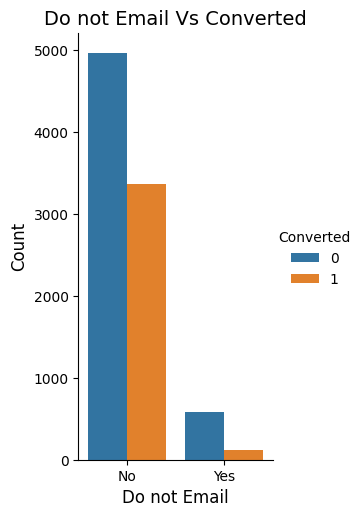

In [ ]:
# Do not Email
sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=lead_df, aspect= 0.6)
plt.title('Do not Email Vs Converted', fontsize = 14)
plt.xlabel("Do not Email", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

Based on the above graph, major conversion has happend from the emails that have been sent

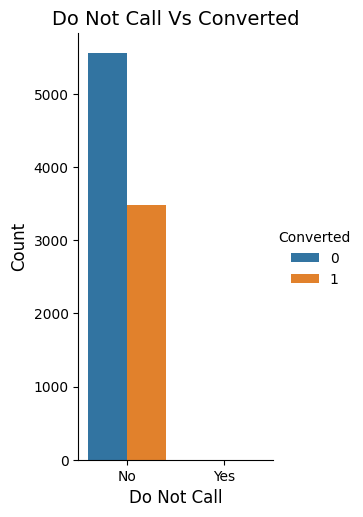

In [ ]:
# Do not Call
sns.catplot(x="Do Not Call", hue = "Converted", kind="count", data=lead_df, aspect= 0.6)
plt.title('Do Not Call Vs Converted', fontsize = 14)
plt.xlabel("Do Not Call", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

From the above graph , it can be noticed that major conversions happened when calls were made.

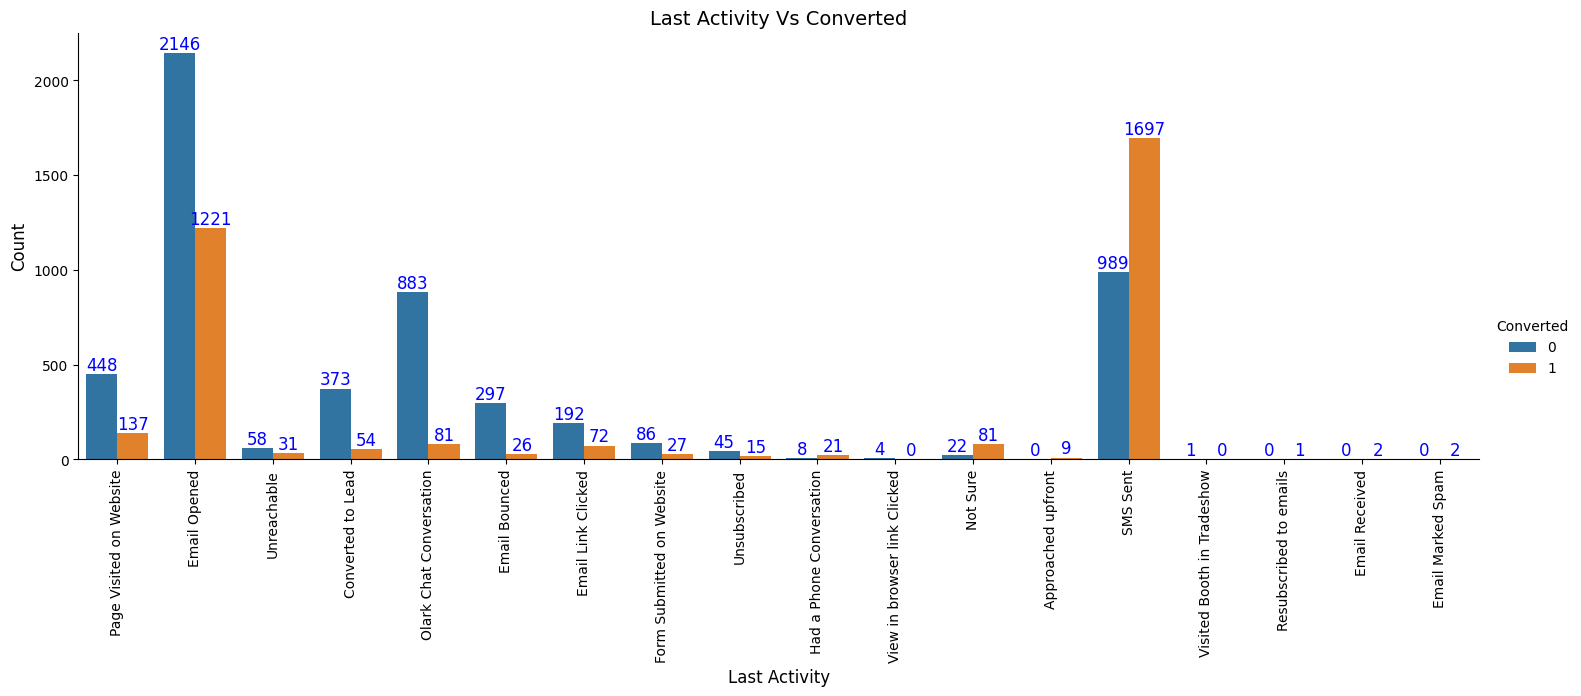

In [ ]:
# Last Activity
plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=lead_df, aspect= 3)
plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation = 90)

ax = plot.facet_axis(0,0)
for p in ax.patches:

    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()

    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

last activity value of 'SMS Sent' had more conversion

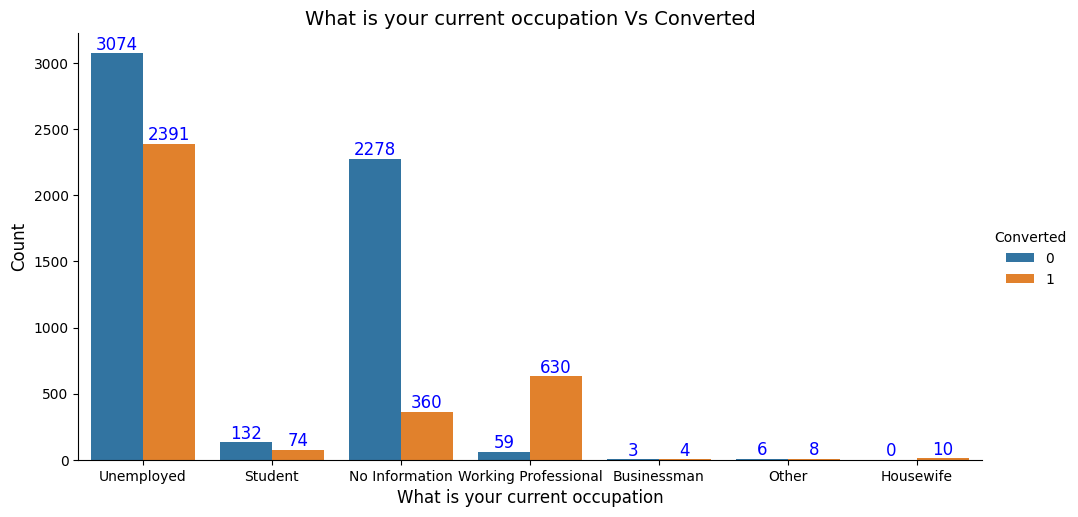

In [ ]:
# What is your current occupation
plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=lead_df, aspect= 2)
plt.title('What is your current occupation Vs Converted', fontsize = 14)
plt.xlabel("What is your current occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:

    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()

    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

More conversion happend with people who are unemployed. It can also be noticed from the above data that - Out of 7 business men, 4 got converted - Out 10 housewives, all 10 leads got converted.

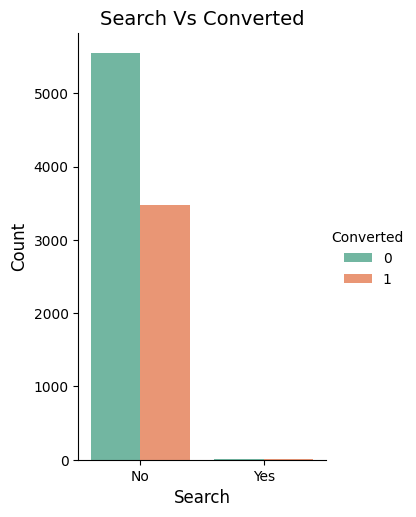

In [ ]:
# Search
sns.catplot(x="Search", hue = "Converted", kind="count", data=lead_df, palette="Set2", aspect = 0.7)
plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

Conversion rate is high on leads who are not through search

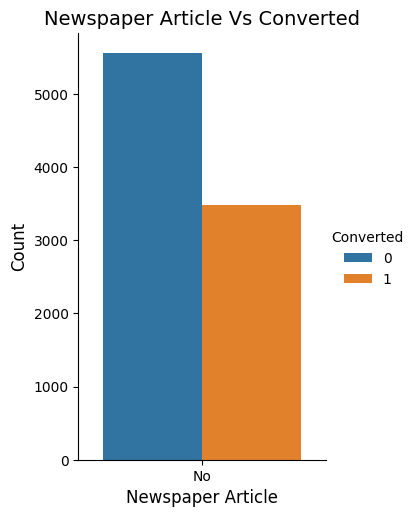

In [ ]:
# Newspaper Article
sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=lead_df, aspect= 0.7)
plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

Since "Newspaper Article" column now has only one value for all rows - "No" , it is safe to drop this column

In [ ]:
lead_df = lead_df.drop(['Newspaper Article'], axis=1)

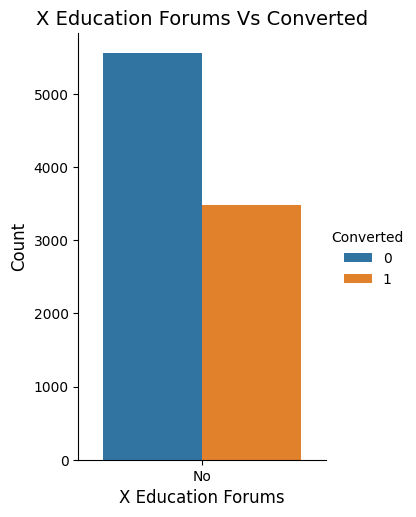

In [ ]:
# X Education Forums
sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=lead_df, aspect= 0.7)
plt.title('X Education Forums Vs Converted', fontsize = 14)
plt.xlabel("X Education Forums", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

Since "X Education Forums" column now has only one value for all rows - "No" , it is safe to drop this column

In [ ]:
lead_df = lead_df.drop(['X Education Forums'], axis=1)

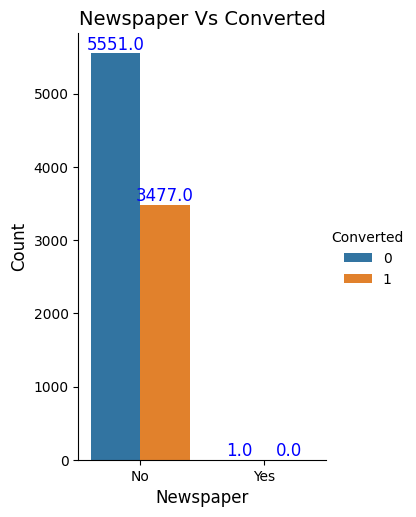

In [ ]:
# Newspaper
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=lead_df, aspect= 0.7)
plt.title('Newspaper Vs Converted', fontsize = 14)
plt.xlabel("Newspaper", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

Since Newspaper column has only one row with "Yes" as the value and further since this lead did not get converted and rest of all the values are "No", we can safely drop the column

In [ ]:
lead_df = lead_df.drop(['Newspaper'], axis=1)

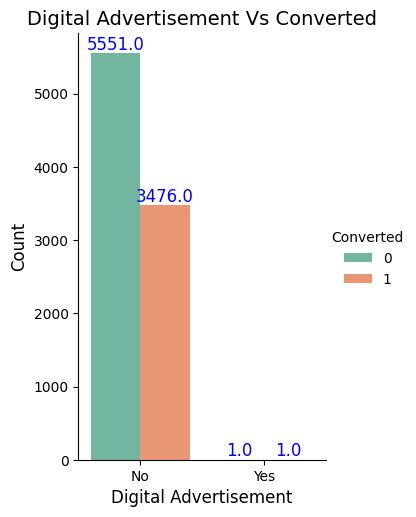

In [ ]:
# Digital Advertisement
plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=lead_df, palette="Set2", aspect = 0.7)
plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be noticed above that there were 2 leads that came from digital advertisement of which one lead got converted

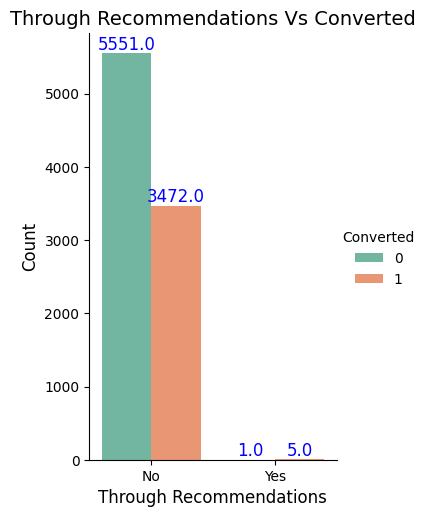

In [ ]:
# Through Recommendations
plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=lead_df, palette="Set2", aspect = 0.7)
plt.title('Through Recommendations Vs Converted', fontsize = 14)
plt.xlabel("Through Recommendations", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be seen that a total of 6 leads came through recommendations of which 5 leads got converted

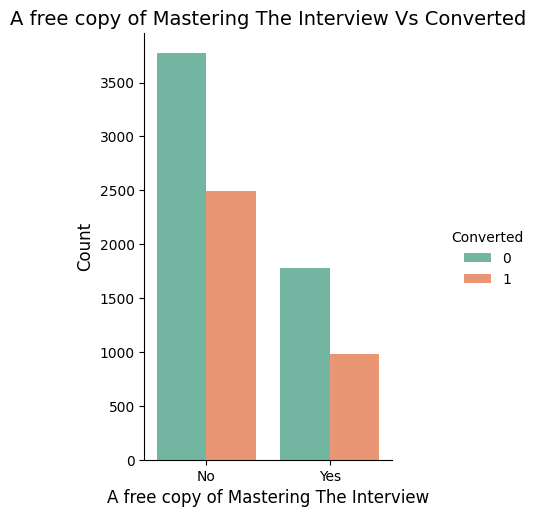

In [ ]:
# A free copy of Mastering The Interview
plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=lead_df, palette="Set2", aspect = 0.7)
plt.title('A free copy of Mastering The Interview Vs Converted', fontsize = 14)
plt.xlabel("A free copy of Mastering The Interview", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

Conversion rate is high on leads who do not want a free copy of Mastering Interviews

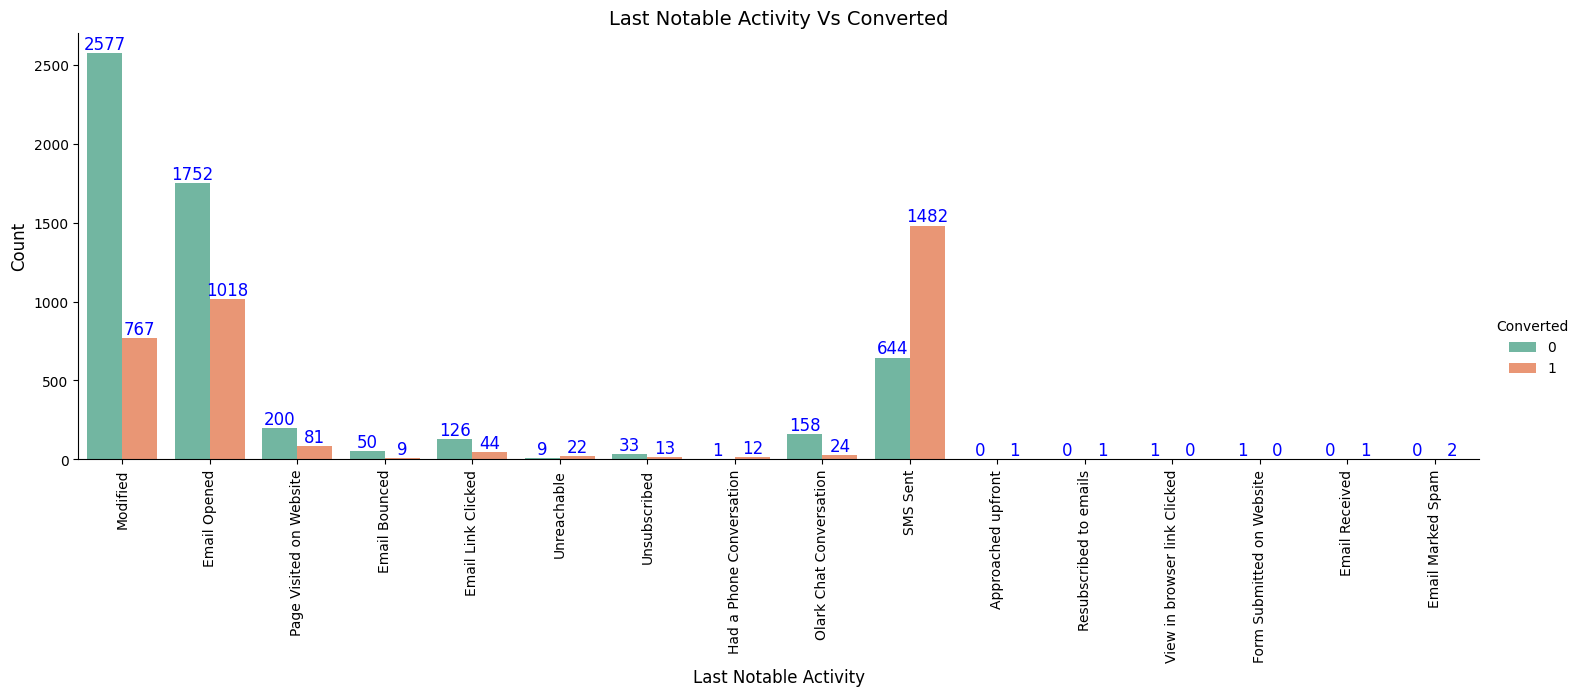

In [ ]:
# Last Notable Activity
plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=lead_df, palette="Set2", aspect = 3.0)
plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

ax = plot.facet_axis(0,0)
for p in ax.patches:

    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()

    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

It can be noticed that the conversion rate is high for "SMS Sent"

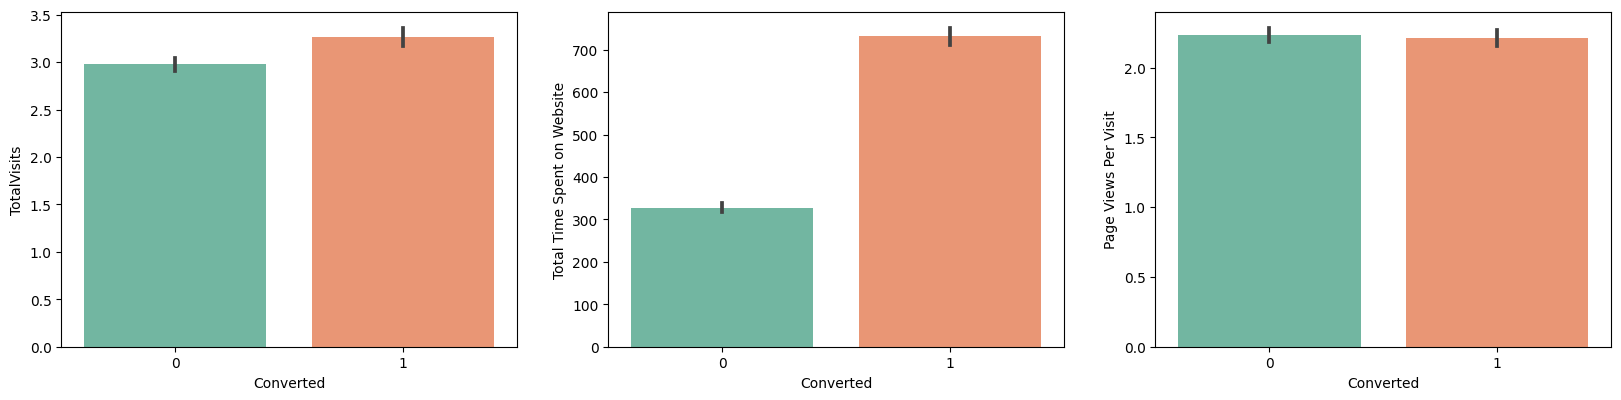

In [ ]:
# Now checking the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = lead_df)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = lead_df)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = lead_df)
plt.show()

The conversion rated were high for Total Visits, Total Time Spent on Website and Page Views Per Visit

# **Step 4: Data Preparation - Creating Dummies**

Converting some binary variables (Yes/No) to 1/0

In [ ]:
variablelist =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations',
                                 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
lead_df[variablelist] = lead_df[variablelist].apply(binary_map)

In [ ]:
# Creating dummies for the following columns below

# Lead Origin :
d_lead_origin = pd.get_dummies(lead_df['Lead Origin'], prefix='LeadOrigin')
# Dropping quick Add Form column
d_lead_origin1 = d_lead_origin.drop(['LeadOrigin_Quick Add Form'], 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df, d_lead_origin1], axis = 1)

# Lead Source :
d_lead_source = pd.get_dummies(lead_df['Lead Source'], prefix='LeadSource')
# Dropping blog column
d_lead_source1 = d_lead_source.drop(['LeadSource_NC_EDM'], 1)
# Adding the results to the master dataframe
lead_df = pd.concat([lead_df,d_lead_source1], axis=1)

# last Activity
d_last_activity = pd.get_dummies(lead_df['Last Activity'], prefix='LastActivity')
# Dropping Resubscribed to emails column
d_last_activity1 = d_last_activity.drop(['LastActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
lead_df = pd.concat([lead_df,d_last_activity1], axis=1)

# What is your current occupation
d_curr_occupation = pd.get_dummies(lead_df['What is your current occupation'], prefix='CurrentOccupation')
# Dropping No Information column
d_curr_occupation1 = d_curr_occupation.drop(['CurrentOccupation_Businessman'], 1)
# Adding the results to the master dataframe
lead_df = pd.concat([lead_df,d_curr_occupation1], axis=1)

# Last Notable Activity
d_last_notable_activity = pd.get_dummies(lead_df['Last Notable Activity'], prefix='LastNotableActivity')
# Dropping Resubscribed to emails column
d_last_notable_activity1 = d_last_notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
lead_df = pd.concat([lead_df,d_last_notable_activity1], axis=1)

In [ ]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Remove following columns from the lead_df:
# a) Prospect ID
# b) Lead Numbers
# c) Lead Origin
# d) Lead Source
# e) Last Activity
# f) What is your current occupation
# g) Last Notable Activity

lead_df = lead_df.drop(['Prospect ID', 'Lead Number', 'Lead Origin',
                        'Lead Source', 'Last Activity','What is your current occupation',
                        'Last Notable Activity'], axis=1)

In [ ]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9029 non-null   int64  
 1   Do Not Call                                       9029 non-null   int64  
 2   Converted                                         9029 non-null   int64  
 3   TotalVisits                                       9029 non-null   float64
 4   Total Time Spent on Website                       9029 non-null   int64  
 5   Page Views Per Visit                              9029 non-null   float64
 6   Search                                            9029 non-null   int64  
 7   Digital Advertisement                             9029 non-null   int64  
 8   Through Recommendations                           9029 non-null   int64  
 9   A free copy of Mast

In [ ]:
# checking for percentage of null values in each column
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Do Not Email                                        0.0
Do Not Call                                         0.0
Converted                                           0.0
TotalVisits                                         0.0
Total Time Spent on Website                         0.0
                                                   ... 
LastNotableActivity_Page Visited on Website         0.0
LastNotableActivity_SMS Sent                        0.0
LastNotableActivity_Unreachable                     0.0
LastNotableActivity_Unsubscribed                    0.0
LastNotableActivity_View in browser link Clicked    0.0
Length: 71, dtype: float64

In [ ]:
lead_df.shape

(9029, 71)

Since there are around 71 columns, we will not be looking at the correlation using heat map as we will not be able to infer anything from the heat map due to huge data

# **Step 5 :Test-Train split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Putting response variable to y
y = lead_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [ ]:
# Putting feature variable to X
X = lead_df.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(6320, 70)

In [ ]:
y_train.shape

(6320,)

In [ ]:
X_test.shape

(2709, 70)

In [ ]:
y_test.shape

(2709,)

**Rescaling the features with MinMax Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
2240,0.0,0.0,0.1875,0.898963,0.375,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
113,0.0,0.0,0.3125,0.706360,0.625,0.0,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
4132,0.0,0.0,0.3750,0.768155,0.750,0.0,0.0,0.0,1.0,0,...,0,0,0,1,0,0,0,0,0,0
5573,0.0,0.0,0.1250,0.028868,0.250,0.0,0.0,0.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
1109,0.0,0.0,0.0625,0.009021,0.125,0.0,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
count,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,...,6320.0,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000
mean,0.076741,0.000316,0.190526,0.216372,0.274801,0.001424,0.000316,0.000475,0.302373,0.393987,...,0.0,0.000158,0.001424,0.369778,0.020886,0.031962,0.238608,0.003481,0.004272,0.000158
std,0.266200,0.017788,0.174576,0.246268,0.225852,0.037713,0.017788,0.021784,0.459322,0.488671,...,0.0,0.012579,0.037713,0.482783,0.143014,0.175913,0.426266,0.058902,0.065227,0.012579
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.062500,0.000902,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.187500,0.107803,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.250000,0.415426,0.375000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Checking the Conversion Rate percentage
converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
converted

38.50924797873519

We have almost 39% conversion rate

# **Step 6: Model Building**

In [ ]:
#Running the Initial Training Model
import statsmodels.api as sm

In [ ]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6259
Model Family:                Binomial   Df Model:                           60
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 05 Aug 2023   Deviance:                   1.6708e+05
Time:                        13:33:52   Pearson chi2:                 8.17e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

**Feature Selection Using RFE**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step = 20)
rfe = rfe.fit(X_train, y_train)

In [ ]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True, False, False,  True,  True, False, False,
        True,  True, False, False, False,  True, False, False,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False,  True, False, False,  True,  True,  True, False,  True,
       False, False, False, False,  True,  True, False,  True,  True,
        True, False, False,  True, False,  True, False, False,  True,
        True,  True, False, False,  True, False, False])

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', True, 1),
 ('Digital Advertisement', False, 3),
 ('Through Recommendations', False, 2),
 ('A free copy of Mastering The Interview', False, 3),
 ('LeadOrigin_API', True, 1),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 2),
 ('LeadSource_Click2call', False, 3),
 ('LeadSource_Direct Traffic', True, 1),
 ('LeadSource_Facebook', True, 1),
 ('LeadSource_Google', False, 2),
 ('LeadSource_Live Chat', False, 3),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', True, 1),
 ('LeadSource_Pay per Click Ads', False, 3),
 ('LeadSource_Press_Release', False, 3),
 ('LeadSource_Reference', False, 2),
 ('LeadSource_Referral Sites', True, 1),
 ('LeadSource_Social Media', False, 3),
 ('LeadSource_WeLearn', False, 3),
 ('LeadSource_Welingak 

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'LeadOrigin_API', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Facebook', 'LeadSource_Olark Chat',
       'LeadSource_Organic Search', 'LeadSource_Referral Sites',
       'LeadSource_Welingak Website', 'LeadSource_bing',
       'LastActivity_Approached upfront', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Email Opened',
       'LastActivity_Had a Phone Conversation', 'LastActivity_Not Sure',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Housewife', 'CurrentOccupation_No Information',
       'CurrentOccupation_Student', 'CurrentOccupation_Unemployed',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Opened',
 

In [ ]:
len(col)

35

**Rebuilding Model - Model 2**

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()

In [ ]:
X_train_sm.shape

(6320, 36)

In [ ]:
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6284
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2476.7
Date:                Sat, 05 Aug 2023   Deviance:                       4953.3
Time:                        13:33:53   Pearson chi2:                 6.57e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4250
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
# Removing column Do Not Call as it has a high pvalue and hence is insignificant
col = col.drop('Do Not Call',1)

In [ ]:
# Model 3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6285
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2477.5
Date:                Sat, 05 Aug 2023   Deviance:                       4955.1
Time:                        13:33:53   Pearson chi2:                 6.58e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4248
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
print(X_train_sm.shape)
print(len(col))

(6320, 35)
34


In [ ]:
# Removing column LastActivity_Approached upfront as it has a high pvalue and hence is insignificant
col = col.drop(['LastActivity_Approached upfront'],1)

In [ ]:
# model 4
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6286
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2483.0
Date:                Sat, 05 Aug 2023   Deviance:                       4966.1
Time:                        13:33:54   Pearson chi2:                 6.58e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4238
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
print(X_train_sm.shape)
print(len(col))

(6320, 34)
33


In [ ]:
# Removing column CurrentOccupation_Housewife upfront as it has a high pvalue and hence is insignificant
col = col.drop(['CurrentOccupation_Housewife'],1)

In [ ]:
# model 5
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6287
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2486.9
Date:                Sat, 05 Aug 2023   Deviance:                       4973.7
Time:                        13:33:54   Pearson chi2:                 6.58e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4231
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
print(X_train_sm.shape)
print(len(col))

(6320, 33)
32


In [ ]:
# Removing column LeadSource_bing upfront as it has a high pvalue and hence is insignificant
col = col.drop(['LeadSource_bing'],1)

In [ ]:
# model 6
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6288
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2487.3
Date:                Sat, 05 Aug 2023   Deviance:                       4974.7
Time:                        13:33:54   Pearson chi2:                 6.58e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4230
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
print(X_train_sm.shape)
print(len(col))

(6320, 32)
31


In [ ]:
# Removing column LastActivity_Converted to Lead  upfront as it has a high pvalue and hence is insignificant
col = col.drop(['LastActivity_Converted to Lead'],1)

In [ ]:
# model 7
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6289
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2487.6
Date:                Sat, 05 Aug 2023   Deviance:                       4975.1
Time:                        13:33:54   Pearson chi2:                 6.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4230
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
print(X_train_sm.shape)
print(len(col))

(6320, 31)
30


In [ ]:
# Removing column LeadSource_Referral Sites upfront as it has a high pvalue and hence is insignificant
col = col.drop(['LeadSource_Referral Sites'],1)

In [ ]:
# model 8
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6290
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2488.0
Date:                Sat, 05 Aug 2023   Deviance:                       4975.9
Time:                        13:33:54   Pearson chi2:                 6.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4229
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
print(X_train_sm.shape)
print(len(col))

(6320, 30)
29


In [ ]:
# Removing column LeadOrigin_API as it has a high pvalue and hence is insignificant
col = col.drop(['LeadOrigin_API'],1)

In [ ]:
# model 9
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6291
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2488.6
Date:                Sat, 05 Aug 2023   Deviance:                       4977.2
Time:                        13:33:55   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4228
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
print(X_train_sm.shape)
print(len(col))

(6320, 29)
28


In [ ]:
# Removing column LeadOrigin_Landing Page Submission as it has a high pvalue and hence is insignificant
col = col.drop(['LeadOrigin_Landing Page Submission'],1)

In [ ]:
# model 10
X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6292
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2489.0
Date:                Sat, 05 Aug 2023   Deviance:                       4978.0
Time:                        13:33:55   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4227
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
print(X_train_sm.shape)
print(len(col))

(6320, 28)
27


In [ ]:
# Removing column LeadSource_Facebook as it has a high pvalue and hence is insignificant
col = col.drop(['LeadSource_Facebook'],1)

In [ ]:
# model 11
X_train_sm = sm.add_constant(X_train[col])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6293
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2489.0
Date:                Sat, 05 Aug 2023   Deviance:                       4978.1
Time:                        13:33:55   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4227
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
print(X_train_sm.shape)
print(len(col))

(6320, 27)
26


In [ ]:
# Removing column LastActivity_Had a Phone Conversation as it has a high pvalue and hence is insignificant
col = col.drop(['LastActivity_Had a Phone Conversation'],1)

In [ ]:
# model 12
X_train_sm = sm.add_constant(X_train[col])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm12.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6294
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2489.8
Date:                Sat, 05 Aug 2023   Deviance:                       4979.6
Time:                        13:33:55   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4226
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
print(X_train_sm.shape)
print(len(col))

(6320, 26)
25


In [ ]:
# Removing column LeadSource_Organic Search as it has a high pvalue and hence is insignificant
col = col.drop(['LeadSource_Organic Search'],1)

In [ ]:
# model 13
X_train_sm = sm.add_constant(X_train[col])
logm13 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm13.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6295
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2490.6
Date:                Sat, 05 Aug 2023   Deviance:                       4981.1
Time:                        13:33:55   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4224
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
print(X_train_sm.shape)
print(len(col))

(6320, 25)
24


In [ ]:
# Removing column LastNotableActivity_Olark Chat Conversation as it has a high pvalue and hence is insignificant
col = col.drop(['LastNotableActivity_Olark Chat Conversation'],1)

In [ ]:
# model 14
X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm14.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6296
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2491.6
Date:                Sat, 05 Aug 2023   Deviance:                       4983.1
Time:                        13:33:55   Pearson chi2:                 6.32e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4223
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
print(X_train_sm.shape)
print(len(col))

(6320, 24)
23


In [ ]:
# Removing column LastNotableActivity_Email Link Clicked as it has a high pvalue and hence is insignificant
col = col.drop(['LastNotableActivity_Email Link Clicked'],1)

In [ ]:
# model 15
X_train_sm = sm.add_constant(X_train[col])
logm15 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm15.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6297
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2492.6
Date:                Sat, 05 Aug 2023   Deviance:                       4985.2
Time:                        13:33:56   Pearson chi2:                 6.32e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4221
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
print(X_train_sm.shape)
print(len(col))

(6320, 23)
22


In [ ]:
# Removing column LastActivity_Email Bounced as it has a high pvalue and hence is insignificant
col = col.drop(['LastActivity_Email Bounced'],1)

In [ ]:
# model 16
X_train_sm = sm.add_constant(X_train[col])
logm16 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm16.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6298
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2493.7
Date:                Sat, 05 Aug 2023   Deviance:                       4987.4
Time:                        13:33:56   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4219
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
print(X_train_sm.shape)
print(len(col))

(6320, 22)
21


In [ ]:
# Removing column LastActivity_Not Sure as it has a high pvalue and hence is insignificant
col = col.drop(['LastActivity_Not Sure'],1)

In [ ]:
# model 17
X_train_sm = sm.add_constant(X_train[col])
logm17 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm17.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2494.6
Date:                Sat, 05 Aug 2023   Deviance:                       4989.2
Time:                        13:33:56   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4217
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
print(X_train_sm.shape)
print(len(col))

(6320, 21)
20


In [ ]:
# Removing column Search as it has a high pvalue and hence is insignificant
col = col.drop(['Search'],1)

In [ ]:
# model 18
X_train_sm = sm.add_constant(X_train[col])
logm18 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm18.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2495.9
Date:                Sat, 05 Aug 2023   Deviance:                       4991.7
Time:                        13:33:56   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4215
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
print(X_train_sm.shape)
print(len(col))

(6320, 20)
19


In [ ]:
# Removing column CurrentOccupation_Student as it has a high pvalue and hence is insignificant
col = col.drop(['CurrentOccupation_Student'],1)

In [ ]:
# model 19
X_train_sm = sm.add_constant(X_train[col])
logm19 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm19.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2498.9
Date:                Sat, 05 Aug 2023   Deviance:                       4997.9
Time:                        13:33:56   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4209
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
print(X_train_sm.shape)
print(len(col))

(6320, 19)
18


In [ ]:
# Removing column CurrentOccupation_Unemployed as it has a high pvalue and hence is insignificant
col = col.drop(['CurrentOccupation_Unemployed'],1)

In [ ]:
# model 20
X_train_sm = sm.add_constant(X_train[col])
logm20 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm20.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2499.2
Date:                Sat, 05 Aug 2023   Deviance:                       4998.3
Time:                        13:33:56   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4209
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
print(X_train_sm.shape)
print(len(col))

(6320, 18)
17


Since the Model 20 seems to be stable with significant pvalues, we shall go ahead with this model for further analysis

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2240    0.714427
113     0.446624
4132    0.716641
5573    0.103557
1109    0.015974
2282    0.043073
2976    0.838055
8431    0.439471
2770    0.797596
5790    0.995893
dtype: float64

In [ ]:
# Reshaping
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.71442719, 0.44662442, 0.71664072, 0.10355717, 0.01597449,
       0.04307319, 0.83805521, 0.43947144, 0.79759583, 0.99589349])

Creating a dataframe with the actual converted flag and the predicted probabilities

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.714427,2240
1,0,0.446624,113
2,1,0.716641,4132
3,0,0.103557,5573
4,0,0.015974,1109


Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.714427,2240,1
1,0,0.446624,113,0
2,1,0.716641,4132,1
3,0,0.103557,5573,0
4,0,0.015974,1109,0


 checking the confusion metrics and accuracy

In [ ]:
from sklearn import metrics
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3424  434]
 [ 703 1759]]


In [ ]:
#checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8200949367088608


Accuracy rate is around 82% which is good. Need to calculate the other metrics as it cannot depend only on the accuracy metrics

**Checking VIFs**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,LastActivity_Email Opened,7.85
13,LastNotableActivity_Email Opened,7.76
3,Page Views Per Visit,6.21
1,TotalVisits,4.70
15,LastNotableActivity_Modified,2.45
10,LastActivity_SMS Sent,2.22
6,LeadSource_Olark Chat,2.19
2,Total Time Spent on Website,2.16
9,LastActivity_Olark Chat Conversation,1.80
4,LeadOrigin_Lead Add Form,1.68


In [ ]:
print(X_train_sm.shape)
print(len(col))

(6320, 18)
17


In [ ]:
# Removing column LastActivity_Email Opened as it has a high VIF and hence is insignificant
col = col.drop(['LastActivity_Email Opened'],1)

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm21 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm21.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.0
Date:                Sat, 05 Aug 2023   Deviance:                       5025.9
Time:                        13:33:57   Pearson chi2:                 6.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4183
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
print(X_train_sm.shape)
print(len(col))

(6320, 17)
16


In [ ]:
# Removing column LastNotableActivity_Email Opened as it has a high pvalue and hence is insignificant
col = col.drop(['LastNotableActivity_Email Opened'],1)

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm22 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm22.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.5
Date:                Sat, 05 Aug 2023   Deviance:                       5026.9
Time:                        13:33:57   Pearson chi2:                 6.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4182
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,5.37
1,TotalVisits,4.68
2,Total Time Spent on Website,2.10
13,LastNotableActivity_Modified,1.73
6,LeadSource_Olark Chat,1.63
8,LastActivity_Olark Chat Conversation,1.58
10,CurrentOccupation_No Information,1.54
9,LastActivity_SMS Sent,1.52
4,LeadOrigin_Lead Add Form,1.49
5,LeadSource_Direct Traffic,1.43


All variables have a good value of VIF. So not need drop any more variables

In [ ]:
print(X_train_sm.shape)
print(len(col))

(6320, 16)
15


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
#sensitivity of logistic regression model
TP / float(TP+FN)

0.7144597887896019

In [ ]:
#specificity
TN / float(TN+FP)

0.8875064800414723

In [ ]:
# Calculating false postive rate - predicting non conversion when leads have converted
FP/ float(TN+FP)

0.11249351995852773

In [ ]:
# positive predictive value
TP / float(TP+FP)

0.8020975832193342

In [ ]:
# Negative predictive value
TN / float(TN+ FN)

0.8296583474678944

# **Step 7: Plotting the ROC Curve**

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob,
                                         drop_intermediate = False )

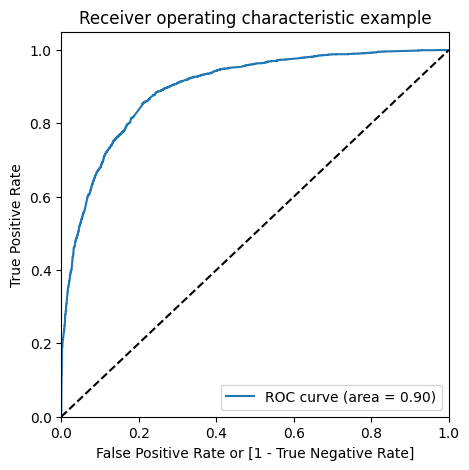

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

**Finding Optimal Cutoff Point**

In [ ]:
# creating columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.714427,2240,1,1,1,1,1,1,1,1,1,0,0
1,0,0.446624,113,0,1,1,1,1,1,0,0,0,0,0
2,1,0.716641,4132,1,1,1,1,1,1,1,1,1,0,0
3,0,0.103557,5573,0,1,1,0,0,0,0,0,0,0,0
4,0,0.015974,1109,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
#calculating accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.389557  1.000000  0.000000
0.1   0.1  0.649051  0.970349  0.444012
0.2   0.2  0.767722  0.923233  0.668481
0.3   0.3  0.805222  0.885053  0.754277
0.4   0.4  0.815665  0.780260  0.838258
0.5   0.5  0.820095  0.714460  0.887506
0.6   0.6  0.809810  0.642161  0.916796
0.7   0.7  0.788291  0.538587  0.947641
0.8   0.8  0.766139  0.449228  0.968377
0.9   0.9  0.719937  0.300975  0.987299


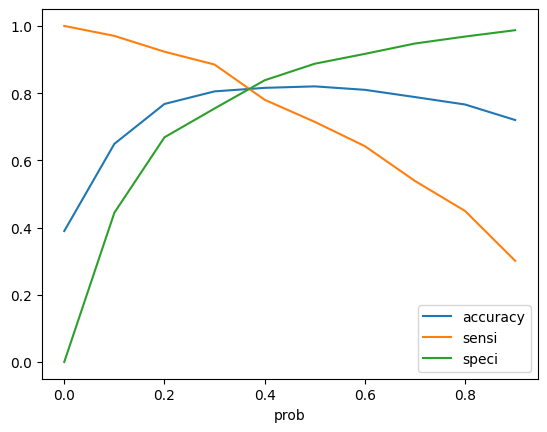

In [ ]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [ ]:
# making the final prediction using 0.37 as the cut off
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.714427,2240,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.446624,113,0,1,1,1,1,1,0,0,0,0,0,1
2,1,0.716641,4132,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.103557,5573,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.015974,1109,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
#calculating the lead score
y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.714427,2240,1,1,1,1,1,1,1,1,1,0,0,1,71
1,0,0.446624,113,0,1,1,1,1,1,0,0,0,0,0,1,45
2,1,0.716641,4132,1,1,1,1,1,1,1,1,1,0,0,1,72
3,0,0.103557,5573,0,1,1,0,0,0,0,0,0,0,0,0,10
4,0,0.015974,1109,0,1,0,0,0,0,0,0,0,0,0,0,2
5,0,0.043073,2282,0,1,0,0,0,0,0,0,0,0,0,0,4
6,1,0.838055,2976,1,1,1,1,1,1,1,1,1,1,0,1,84
7,0,0.439471,8431,0,1,1,1,1,1,0,0,0,0,0,1,44
8,1,0.797596,2770,1,1,1,1,1,1,1,1,1,0,0,1,80
9,1,0.995893,5790,1,1,1,1,1,1,1,1,1,1,1,1,100


In [ ]:
# checking if 80% cases are correctly predicted based on the converted column.
# the total of final predicted conversion / non conversion counts from the actual converted rates
checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1976
0     486
Name: final_predicted, dtype: int64

In [ ]:
# checking the precentage of final_predicted conversions
1976/float(1976+486)

0.8025995125913891

Hence we can see that the final prediction of conversions have a target of 80% conversion as per the X Educations CEO's requirement . Hence this is a good model.

**Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set**

In [ ]:
# checking the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8150316455696203

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3175,  683],
       [ 486, 1976]])

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# The sensitivity of our logistic regression model
TP / float(TP+FN)

0.8025995125913891

In [ ]:
# Calculating specificity
TN / float(TN+FP)

0.8229652669777087

In [ ]:
# Calculating false postive rate - predicting conversions when leads has not converted
FP/ float(TN+FP)

0.17703473302229134

In [ ]:
# Positive predictive value
TP / float(TP+FP)

0.7431365174877773

In [ ]:
# Negative predictive value
TN / float(TN+ FN)

0.8672493854138213

**Metrics - Precision and Recall**

In [ ]:
#Looking at the confusion matrix again
metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )

array([[3424,  434],
       [ 703, 1759]])

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
# precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8020975832193342

In [ ]:
# recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7144597887896019

**Precision and recall tradeoff**

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6315    1
 6316    1
 6317    0
 6318    0
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       1
 1       0
 2       1
 3       0
 4       0
        ..
 6315    0
 6316    1
 6317    0
 6318    0
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

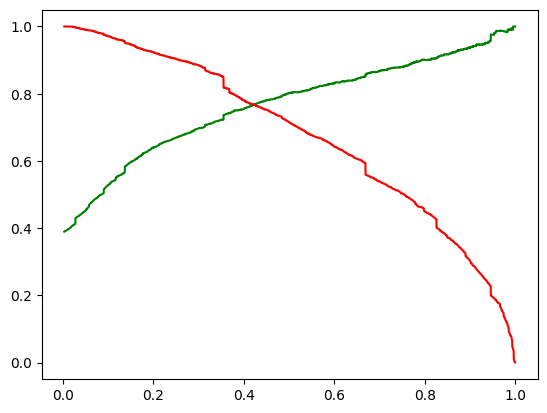

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#**Step 8: Making predictions on the test set**

In [ ]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
2296,0.0,0.0,0.1875,0.649208,0.37500,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
8697,0.0,0.0,0.4375,0.179577,0.21875,0.0,0.0,0.0,1.0,0,...,0,0,0,0,0,0,1,0,0,0
7378,0.0,0.0,0.1250,0.159331,0.25000,0.0,0.0,0.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
8631,0.0,0.0,0.3125,0.397447,0.62500,0.0,0.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
4799,0.0,0.0,0.5000,0.726673,1.00000,0.0,0.0,0.0,0.0,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_test = X_test[col]
X_test

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Olark Chat Conversation,LastActivity_SMS Sent,CurrentOccupation_No Information,CurrentOccupation_Working Professional,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Unreachable
2296,0.0,0.1875,0.649208,0.37500,0,0,0,0,0,1,0,0,0,0,0
8697,0.0,0.4375,0.179577,0.21875,0,1,0,0,0,1,0,0,0,0,0
7378,0.0,0.1250,0.159331,0.25000,0,1,0,0,0,0,0,0,0,0,0
8631,0.0,0.3125,0.397447,0.62500,0,0,0,0,0,1,0,0,0,1,0
4799,0.0,0.5000,0.726673,1.00000,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,0.3125,0.083187,0.31250,0,0,0,0,0,0,1,0,0,0,0
7783,0.0,0.2500,0.103873,0.50000,0,1,0,0,0,0,0,0,0,0,0
6255,0.0,0.0000,0.000000,0.00000,0,0,1,0,0,1,0,0,0,0,0
5390,0.0,0.0000,0.000000,0.00000,1,0,0,0,0,1,0,0,0,0,0


In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

2296    0.911144
8697    0.576223
7378    0.167217
8631    0.617370
4799    0.932766
4503    0.373358
7129    0.880706
1717    0.137260
8398    0.758837
5116    0.215229
dtype: float64

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
y_pred_1.head()

,0
2296,0.911144
8697,0.576223
7378,0.167217
8631,0.617370
4799,0.932766


In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting LeadId to index
y_test_df['LeadId'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,LeadId,0
0,1,2296,0.911144
1,0,8697,0.576223
2,0,7378,0.167217
3,0,8631,0.617370
4,1,4799,0.932766


In [ ]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [ ]:
y_pred_final.head()

,Converted,LeadId,Converted_Prob
0,1,2296,0.911144
1,0,8697,0.576223
2,0,7378,0.167217
3,0,8631,0.617370
4,1,4799,0.932766


In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final[['Converted','LeadId','Converted_Prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))
y_pred_final.head()

,Converted,LeadId,Converted_Prob,Lead_Score
0,1,2296,0.911144,91
1,0,8697,0.576223,58
2,0,7378,0.167217,17
3,0,8631,0.617370,62
4,1,4799,0.932766,93


In [ ]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.37%
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [ ]:
y_pred_final.head()

,Converted,LeadId,Converted_Prob,Lead_Score,final_predicted
0,1,2296,0.911144,91,1
1,0,8697,0.576223,58,1
2,0,7378,0.167217,17,0
3,0,8631,0.617370,62,1
4,1,4799,0.932766,93,1


In [ ]:
#calculating the lead score
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,Converted,LeadId,Converted_Prob,Lead_Score,final_predicted
0,1,2296,0.911144,91,1
1,0,8697,0.576223,58,1
2,0,7378,0.167217,17,0
3,0,8631,0.617370,62,1
4,1,4799,0.932766,93,1
5,0,4503,0.373358,37,1
6,0,7129,0.880706,88,1
7,0,1717,0.137260,14,0
8,0,8398,0.758837,76,1
9,1,5116,0.215229,22,0


In [ ]:
# checking if 80% cases are correctly predicted based on the converted column.
# getting the total of final predicted conversion or non conversion counts from the actual converted rates
checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    806
0    209
Name: final_predicted, dtype: int64

In [ ]:
# checking the precentage of final_predicted conversions on test data
806/float(806+209)

0.7940886699507389

Hence we can see that the final prediction of conversions have a target rate of 79%(Around 1 % short of the predictions made on training data set)

**Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity on test set**

In [ ]:
# checking the accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.813953488372093

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1399,  295],
       [ 209,  806]])

In [ ]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.7940886699507389

In [ ]:
# specificity
TN / float(TN+FP)

0.8258559622195986

In [ ]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7320617620345141
recall  0.7940886699507389


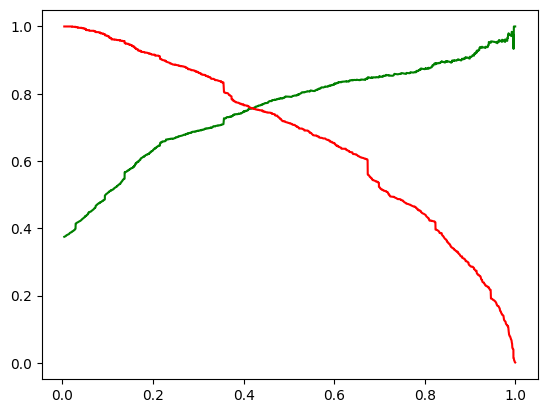

In [ ]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()